# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from time import sleep
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# city = "London"
# define url
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

ModuleNotFoundError: No module named 'api_keys'

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name    

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

In [ ]:
cities

In [ ]:
response = requests.get(query_url + city)
response.status_code

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
# Loop through the list of cities and perform a request for data on each

city_count = []
cloudiness = []
country = []
date = []
humiditys = []
lats = []
longs = []
max_temp = []
# temps = []
winds = []
pressures = []

count = 0
set_num = 1

for city in cities:

        
    try:
        response = requests.get(query_url + city).json()
#         response.status_code == 200: 

          

        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humiditys.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        longs.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        winds.append(response['wind']['speed'])
       
        if count != 49:
            count += 1
            city_count.append(city)
        
        else:
            count = 1
            set_num += 1
            city_count.append(city)
            
            
        print(f"Processing Record {count} of Set {set_num} | {city}")      


    except Exception:
            lats.append(np.nan)
            longs.append(np.nan)
            max_temp.append(np.nan)
            winds.append(np.nan)
            date.append(np.nan)
            humiditys.append(np.nan)
            cloudiness.append(np.nan)
            country.append(np.nan)
#             count += 1
            print("City not found. Skipping...")

        
    sleep(1)
    

In [ ]:
lats

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
#creating dataframe
weather_data = pd.DataFrame()

weather_data["City"] = cities
weather_data["Latitude"] = lats
weather_data["Longitude"] = longs
weather_data["Max Temp"] = max_temp
weather_data["Humidity"] = humiditys
weather_data["Cloudiness"] = cloudiness
weather_data["Wind Speed"] = winds
weather_data["Country"] = country
weather_data["Date"] = date

# displaying dataframe
weather_data



NameError: name 'cities' is not defined

In [4]:
data = weather_data.to_html
data

<bound method DataFrame.to_html of Empty DataFrame
Columns: []
Index: []>

In [217]:
# displaying dataframe for 10 or less rows
weather_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,60.53,83.0,34.0,2.53,US,1.627796e+09
1,mataura,-46.1927,168.8643,48.47,99.0,100.0,1.48,NZ,1.627796e+09
2,rikitea,-23.1203,-134.9692,70.47,72.0,44.0,19.57,PF,1.627796e+09
3,namatanai,-3.6667,152.4333,82.92,70.0,29.0,3.47,PG,1.627796e+09
4,labuhan,-6.8844,112.2051,87.80,56.0,14.0,6.51,ID,1.627796e+09


In [218]:
# export data to cvs
weather_data.to_csv(output_data_file, index=False, header=True)

In [219]:
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.856064,20.151992,70.419441,68.576577,51.731532,7.589207,1.627796e+09
std,32.477412,91.361169,14.404284,21.924695,38.773502,5.482809,2.465835e+02
min,-54.800000,-175.200000,33.330000,7.000000,0.000000,0.000000,1.627796e+09
25%,-6.860550,-63.231700,59.740000,55.000000,10.500000,3.440000,1.627796e+09
50%,25.519800,25.570100,72.270000,73.000000,53.000000,6.400000,1.627796e+09
75%,44.832900,102.015050,82.050000,86.000000,91.000000,10.360000,1.627797e+09
max,78.218600,179.316700,104.490000,100.000000,100.000000,31.070000,1.627797e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [220]:
mask = weather_data.Humidity > 100
weather_data.loc[mask]

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

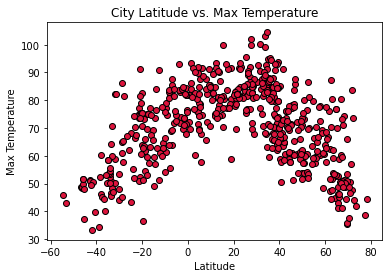

In [221]:
x_values = weather_data["Latitude"]
y_values = weather_data["Max Temp"]

# make plot
plt.scatter(x_values,y_values, color="crimson", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature")
plt.show()

## Latitude vs. Humidity Plot

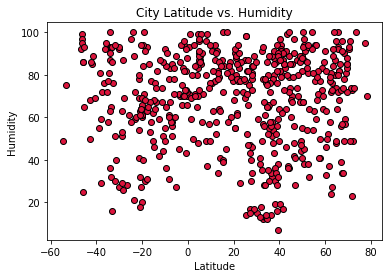

In [222]:
x_values = weather_data["Latitude"]
y_values = weather_data["Humidity"]

# make plot
plt.scatter(x_values,y_values, color="crimson", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

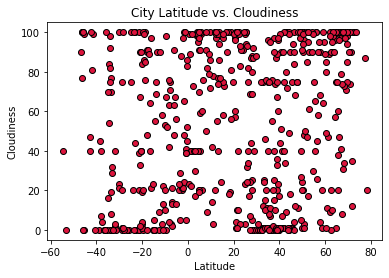

In [223]:
x_values = weather_data["Latitude"]
y_values = weather_data["Cloudiness"]

# make plot
plt.scatter(x_values,y_values, color="crimson", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

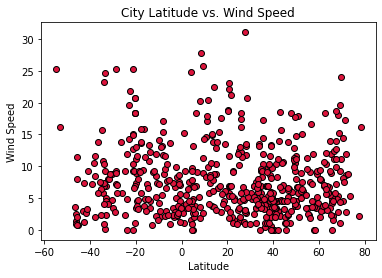

In [224]:
x_values = weather_data["Latitude"]
y_values = weather_data["Wind Speed"]

# make plot
plt.scatter(x_values,y_values, color="crimson", edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed")
plt.show()

## Linear Regression

In [225]:
# identify northern hemisphere and southern hemisphere

northern_hem = weather_data.loc[weather_data["Latitude"] >= 0 ]
southern_hem = weather_data.loc[weather_data["Latitude"] < 0 ]
northern_hem.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,3.870000e+02
mean,37.600991,15.449725,72.892920,69.056848,55.180879,7.390284,1.627796e+09
std,19.795495,89.935638,14.029131,22.385966,39.010207,5.410663,2.418465e+02
min,0.516700,-173.300000,35.560000,7.000000,0.000000,0.000000,1.627796e+09
25%,22.286550,-72.276850,62.195000,54.500000,14.500000,3.440000,1.627796e+09
50%,38.205900,25.200000,74.910000,76.000000,68.000000,5.840000,1.627796e+09
75%,52.247850,96.147600,83.300000,87.000000,95.000000,10.090000,1.627797e+09
max,78.218600,179.316700,104.490000,100.000000,100.000000,31.070000,1.627797e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

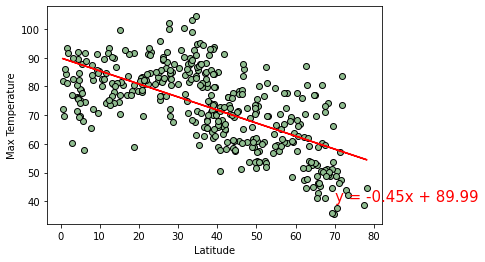

In [226]:
x_values = northern_hem["Latitude"]
y_values = northern_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, color="darkseagreen", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

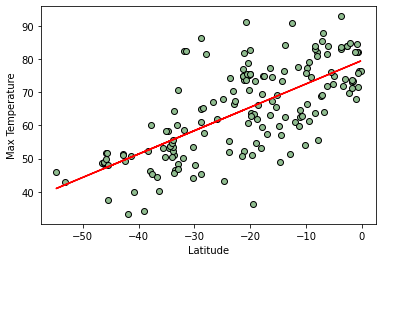

In [227]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, color="darkseagreen", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-15,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

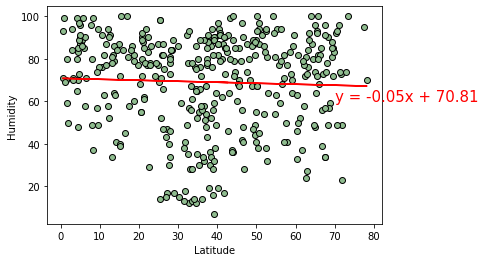

In [228]:
x_values = northern_hem["Latitude"]
y_values = northern_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, color="darkseagreen", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

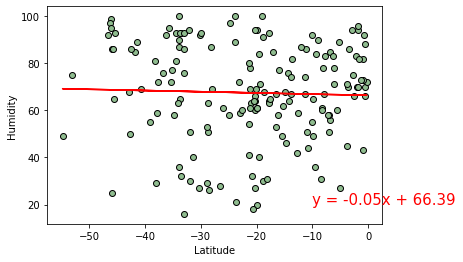

In [229]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, color="darkseagreen", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-10,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

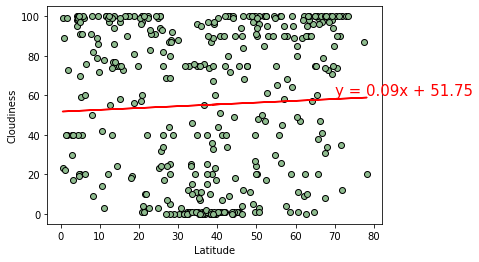

In [230]:
x_values = northern_hem["Latitude"]
y_values = northern_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, color="darkseagreen", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

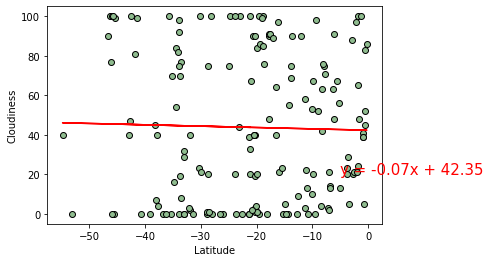

In [231]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, color="darkseagreen", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-5,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

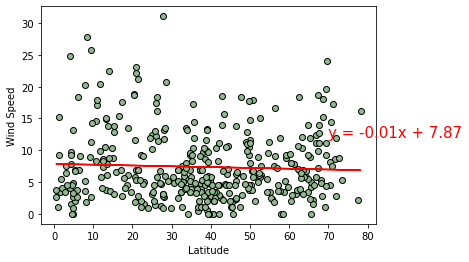

In [232]:
x_values = northern_hem["Latitude"]
y_values = northern_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, color="darkseagreen", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(70,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

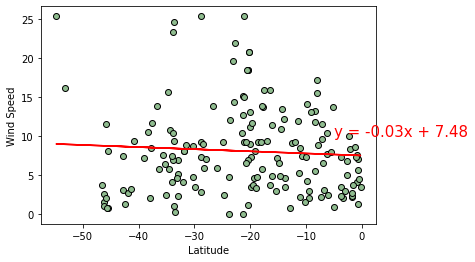

In [233]:
x_values = southern_hem["Latitude"]
y_values = southern_hem["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, color="darkseagreen", edgecolor="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-5,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()